In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

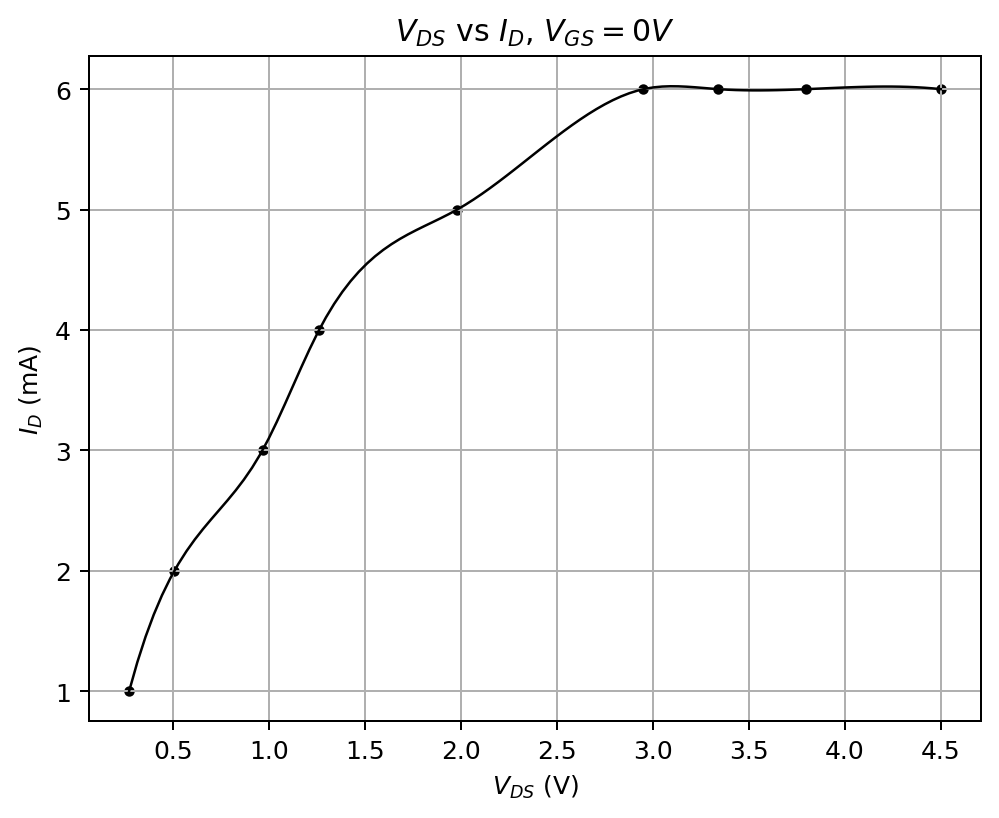

In [2]:
df1 = pd.read_csv('ip.csv')

fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'$V_{DS}$ (V)')
ax.set_ylabel(r'$I_{D}$ (mA)')
ax.set_title(r'$V_{DS}$ vs $I_{D}$, $V_{GS} = 0V$')
ax.grid()
x_clean = df1['vgs0'].dropna()
y_clean = df1['igs0'].dropna()
X_Y_Spline = make_interp_spline(x_clean, y_clean)
x = np.linspace(df1['vgs0'].min(), df1['vgs0'].max(), 100)
y = X_Y_Spline(x)
ax.set_xticks(np.linspace(0,5,11))
ax.plot(x,y, linewidth=1, color='k')
ax.scatter(df1['vgs0'], df1['igs0'], color='k', marker='o', sizes=[10])
fig.savefig('vgs0.jpeg', bbox_inches="tight")
plt.show()
plt.close()

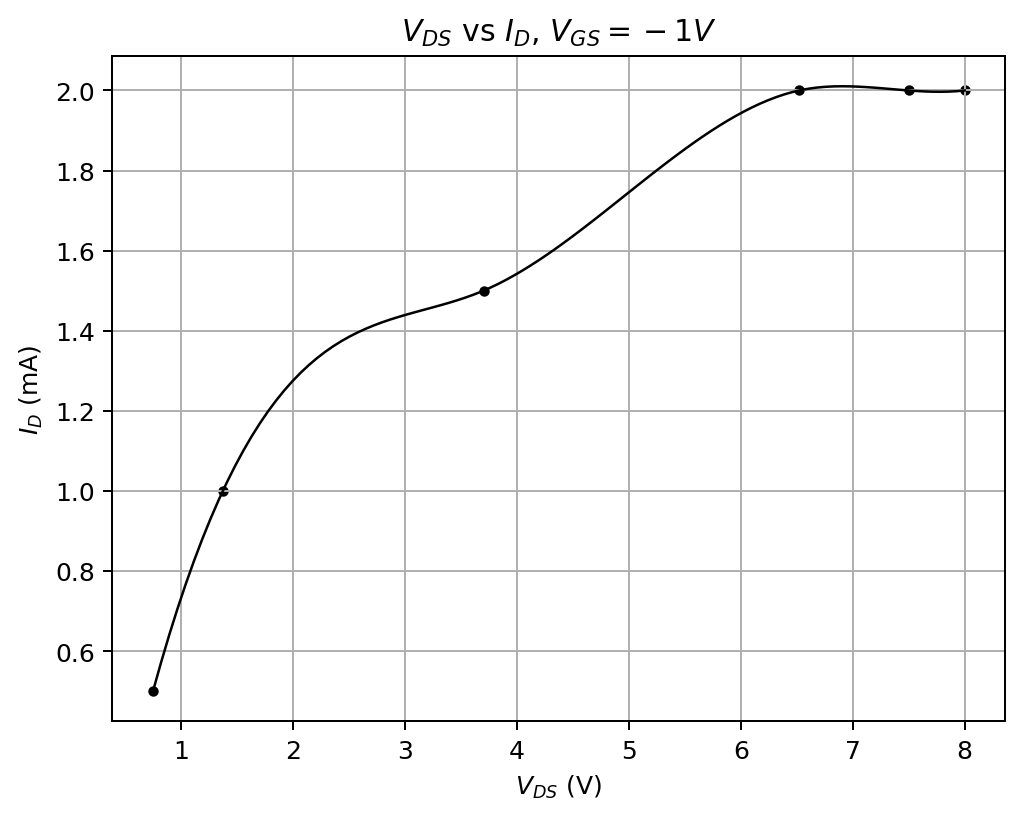

In [3]:
fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'$V_{DS}$ (V)')
ax.set_ylabel(r'$I_{D}$ (mA)')
ax.set_title(r'$V_{DS}$ vs $I_{D}$, $V_{GS} = -1V$')
ax.grid()
x_clean = df1['vgs1'].dropna()
y_clean = df1['igs1'].dropna()
X_Y_Spline = make_interp_spline(x_clean, y_clean)
x = np.linspace(df1['vgs1'].min(), df1['vgs1'].max(), 100)
y = X_Y_Spline(x)
ax.set_xticks(np.linspace(0,8,9))
ax.plot(x,y, linewidth=1, color='k')
ax.scatter(df1['vgs1'], df1['igs1'], color='k', marker='o', sizes=[10])
fig.savefig('vgs1.jpeg', bbox_inches="tight")
plt.show()
plt.close()

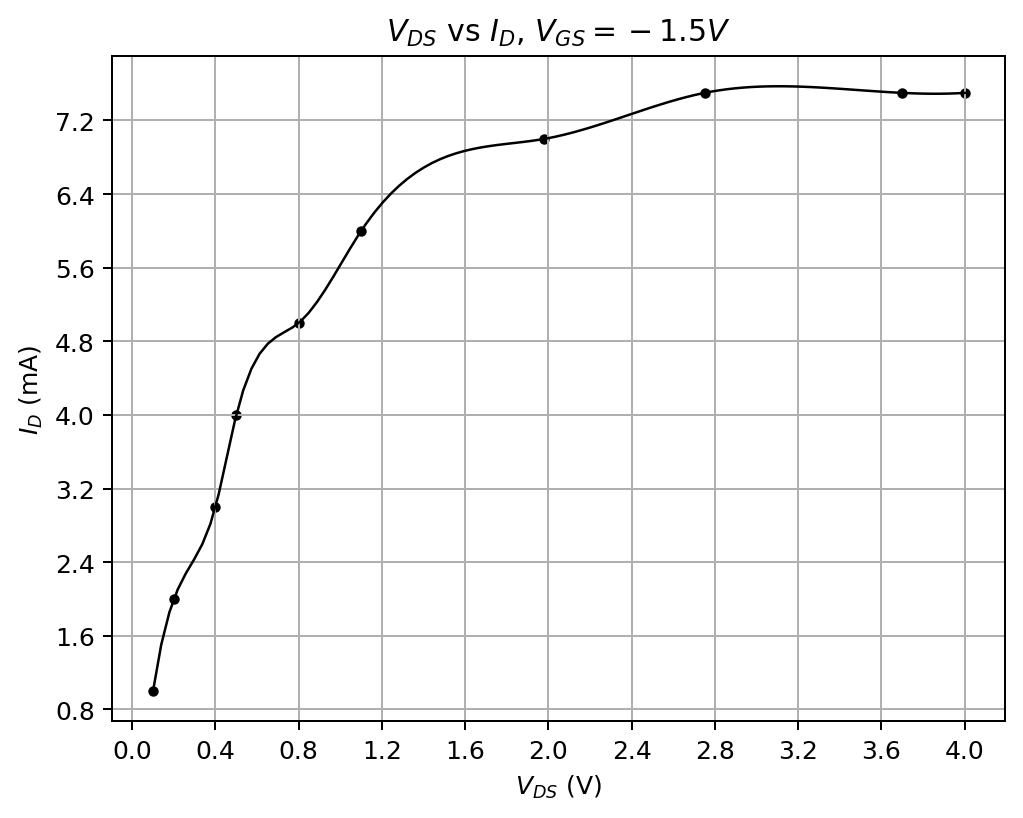

In [4]:
fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'$V_{DS}$ (V)')
ax.set_ylabel(r'$I_{D}$ (mA)')
ax.set_title(r'$V_{DS}$ vs $I_{D}$, $V_{GS} = -1.5V$')
ax.grid()
x_clean = df1['vgs15'].dropna()
y_clean = df1['igs15'].dropna()
X_Y_Spline = make_interp_spline(x_clean, y_clean)
x = np.linspace(df1['vgs15'].min(), df1['vgs15'].max(), 100)
y = X_Y_Spline(x)
ax.set_xticks(np.linspace(0,4,11))
ax.set_yticks(np.linspace(0,8,11))
ax.plot(x,y, linewidth=1, color='k')
ax.scatter(df1['vgs15'], df1['igs15'], color='k', marker='o', sizes=[10])
fig.savefig('vgs15.jpeg', bbox_inches="tight")
plt.show()
plt.close()

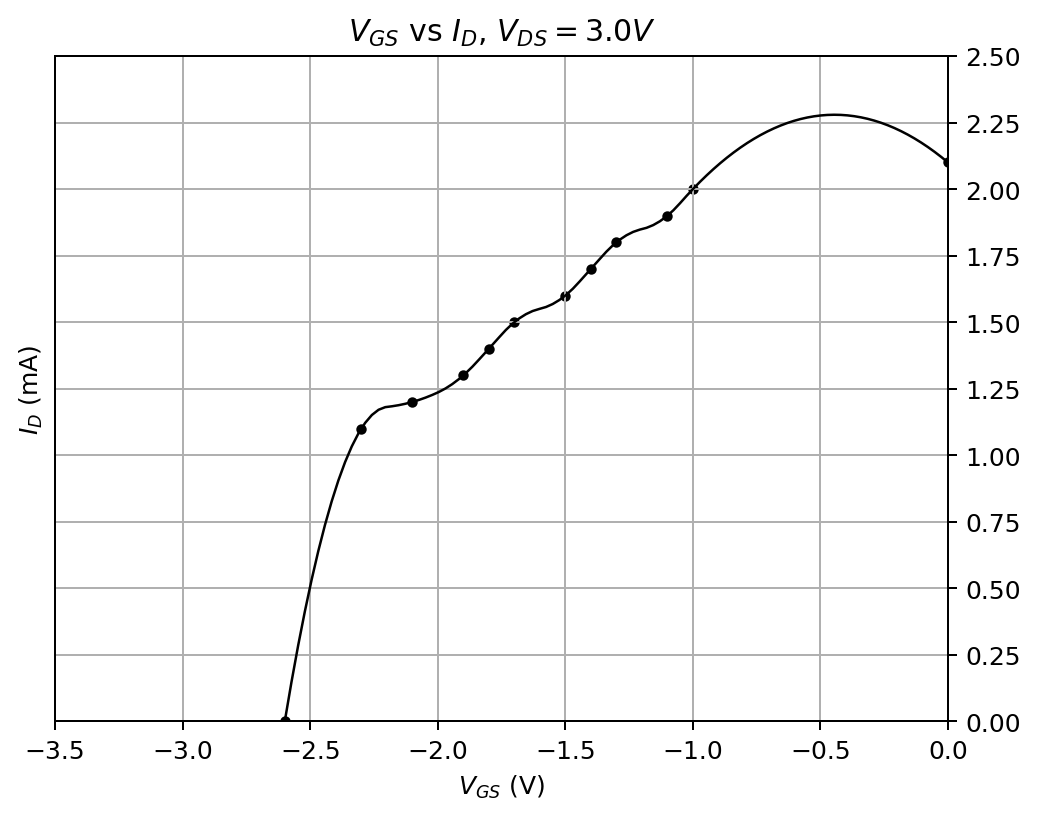

In [5]:
df2 = pd.read_csv('op.csv')


fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'$V_{GS}$ (V)')
ax.set_ylabel(r'$I_{D}$ (mA)')
ax.yaxis.tick_right()
ax.set_title(r'$V_{GS}$ vs $I_{D}$, $V_{DS} = 3.0V$')
ax.grid()
x_clean = df2['vgs'].dropna()
y_clean = df2['id'].dropna()
X_Y_Spline = make_interp_spline(x_clean, y_clean, k=2)
ax.set_xlim([-3,0])
ax.set_ylim([0,2.5])
x = np.linspace(x_clean.min(), x_clean.max(), 100)
y = X_Y_Spline(x)
ax.set_yticks(np.linspace(0,2.5,11))
ax.set_xticks(np.linspace(-3.5,0,8))
ax.plot(-x,y, linewidth=1, color='k')
ax.scatter(-df2['vgs'], df2['id'], color='k', marker='o', sizes=[10])
fig.savefig('vgs.jpeg', bbox_inches="tight")
plt.show()
plt.close()

347993.1392926596


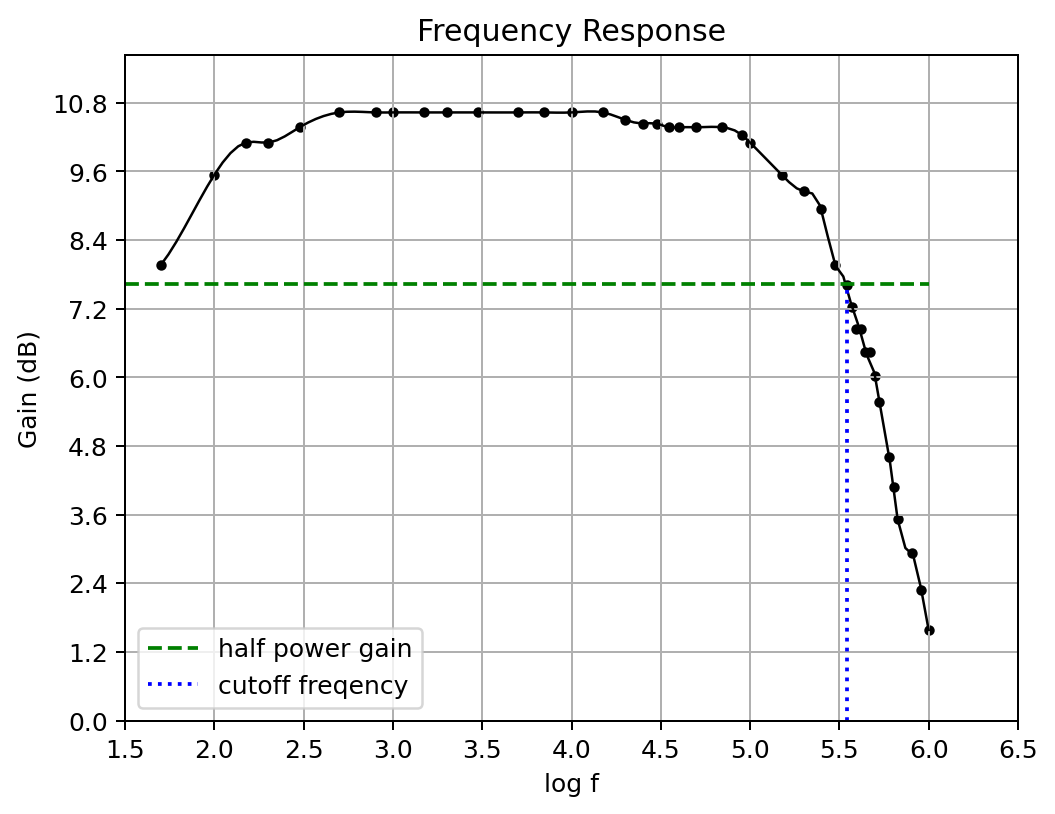

In [7]:
df3 = pd.read_csv('bode.csv')
from scipy import interpolate

freq = df3['freq'].to_numpy()
logFreq = np.log10(freq)

involtage = 0.2
gaindB = 20 * np.log10(df3['out'].to_numpy()/involtage)

peak = gaindB.max()
cutoff_freq = interpolate.InterpolatedUnivariateSpline(logFreq, gaindB -(peak - 3))
print(10**cutoff_freq.roots()[0])
fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'log f')
ax.set_ylabel(r'Gain (dB)')
#ax.yaxis.tick_right()
ax.set_title(r'Frequency Response')
ax.grid()
x_clean = logFreq
y_clean = gaindB
X_Y_Spline = make_interp_spline(x_clean, y_clean, k=3)

x = np.linspace(x_clean.min(), x_clean.max(), 100)
y = X_Y_Spline(x)
ax.set_yticks(np.linspace(0,12,11))
ax.set_xticks(np.linspace(0,7,15))
ax.set_xlim([1.5,logFreq.max()+0.5])
ax.set_ylim([0,peak+1])
ax.plot(x,y, linewidth=1, color='k')
ax.scatter(logFreq,gaindB, color='k', marker='o',sizes=[10])
ax.hlines(peak - 3, 1.5, 6, linestyles='dashed', colors='green', label='half power gain')
ax.vlines(cutoff_freq.roots(), 0, peak-3, linestyles='dotted', colors='blue', label='cutoff freqency')
ax.legend()
fig.savefig('bode.jpeg', bbox_inches="tight")
plt.show()
plt.close()
